### Web Cam Calibration for Sepecific Camera models belonging to MobileX Station

#### w:50cm, d:50cm, 보드 사각형의 크기

In [11]:
import cv2
import time  # 지연을 위해 time 모듈을 임포트합니다.

def capture_image_from_webcam(filename='assets/test.jpg'):
    cap = cv2.VideoCapture(-1)  # 웹캠 인덱스 조정

    if not cap.isOpened():
        print("Error: 웹캠을 열 수 없습니다.")
        return

    time.sleep(10)  # 웹캠이 완전히 초기화될 시간을 줍니다.

    ret, frame = cap.read()
    if not ret:
        print("Error: 프레임을 읽을 수 없습니다.")
    else:
        cv2.imwrite(filename, frame)
        print(f"{filename}으로 이미지가 저장되었습니다.")

    cap.release()

if __name__ == "__main__":
    capture_image_from_webcam()


Error: 웹캠을 열 수 없습니다.


[ WARN:0@321.389] global cap_v4l.cpp:986 open VIDEOIO(V4L2): can't find camera device
[ WARN:0@321.390] global obsensor_stream_channel_v4l2.cpp:82 xioctl ioctl: fd=-1, req=-2140645888
[ WARN:0@321.390] global obsensor_stream_channel_v4l2.cpp:138 queryUvcDeviceInfoList ioctl error return: 9
[ WARN:0@321.390] global obsensor_stream_channel_v4l2.cpp:82 xioctl ioctl: fd=-1, req=-2140645888
[ WARN:0@321.390] global obsensor_stream_channel_v4l2.cpp:138 queryUvcDeviceInfoList ioctl error return: 9
[ERROR:0@321.390] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


이 방법은 대상의 실제크기를 알 수 있을 때만 사용가능하다. -> 이거 자체는 사실 걍 실제크기만 알면 바로 되긴함.

모르면 못 함.

ex) 170인 사람이 이정도 칸 에 꽉차면 5미터다

그래서 monocular depth estimation을 사용할 예정.

이 데이터셋은 해당 모델이 정확한지 알아보기 위험으로 쓰자.

+) 정확도 개판인데..?

그럼 생각해야할 것.

1. "누구인지" 가 매우 중요해졌다.
2. 바운딩 박스를 robust하게 만들어볼 수 있다면..

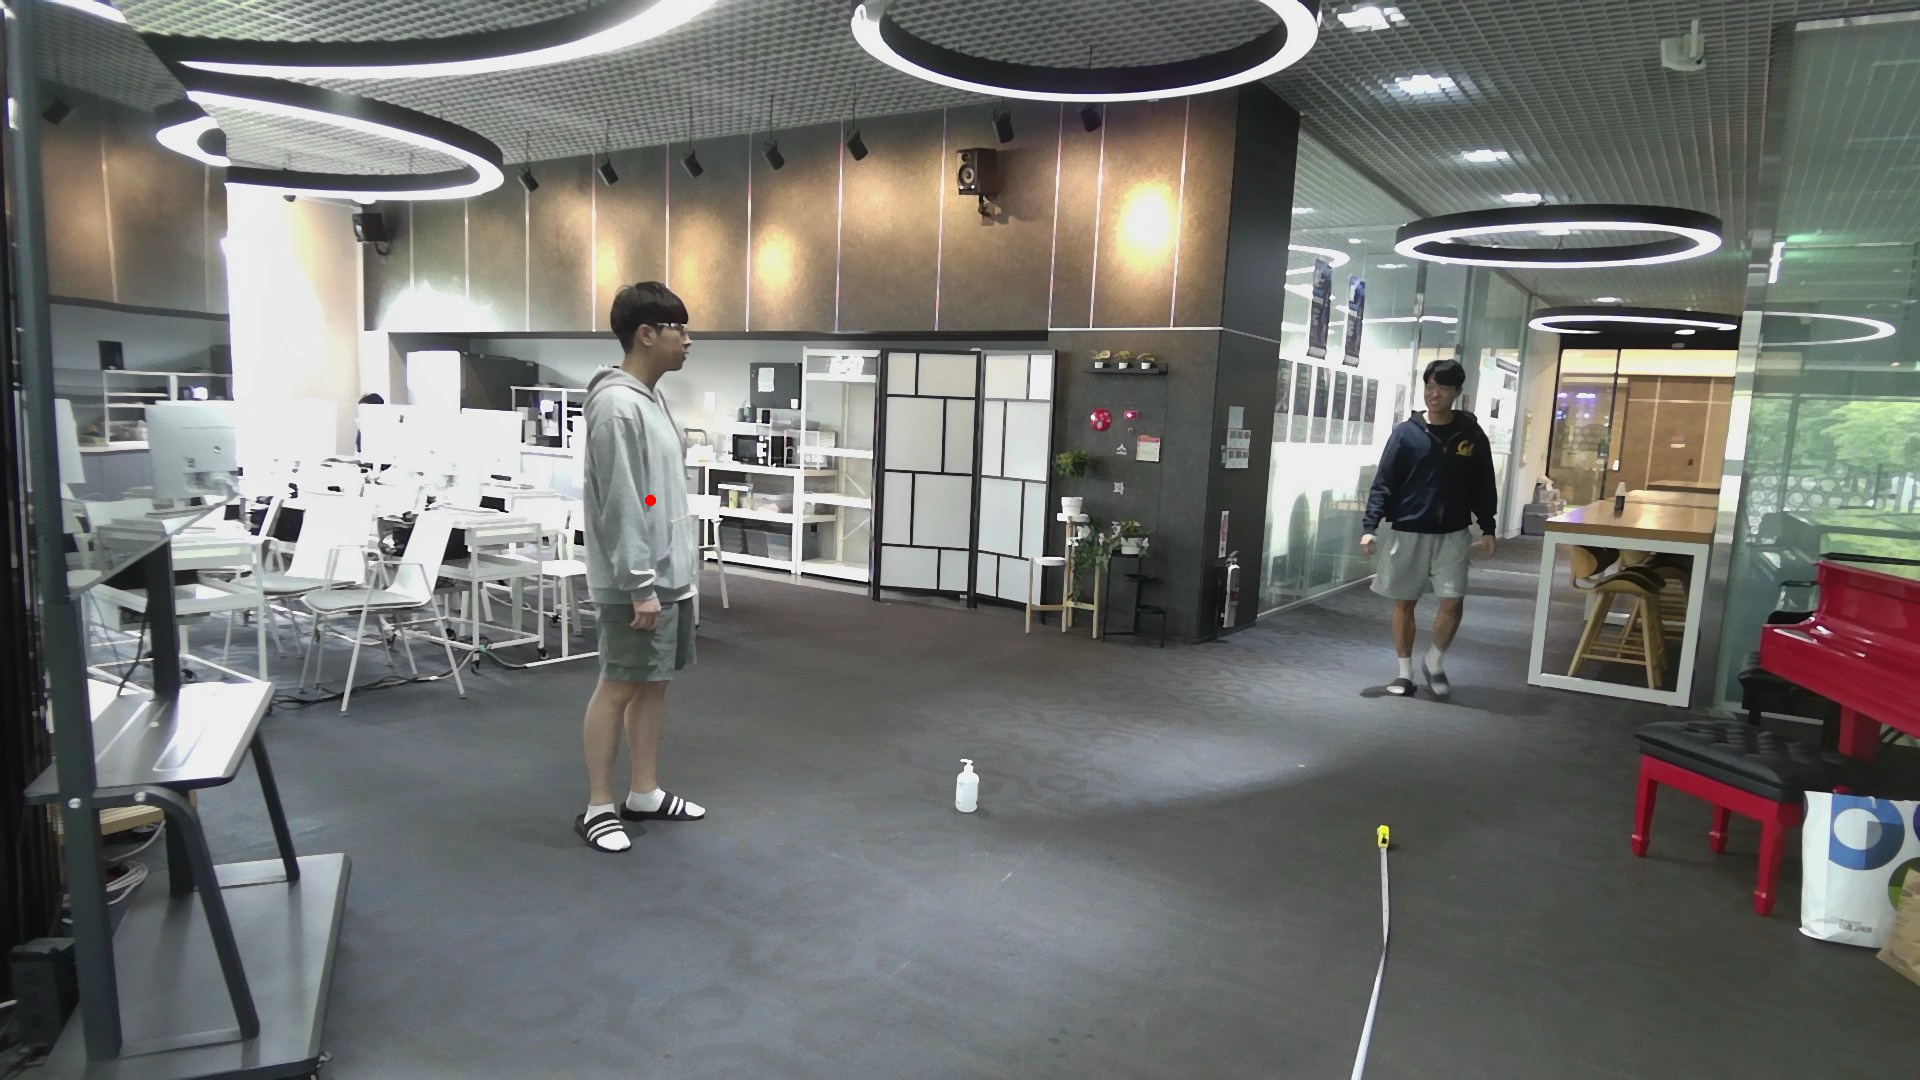

In [16]:
from PIL import Image, ImageDraw

image_path = "assets/other_act/3m80_C2.jpg"  # Your local file path

# 이미지 열기
image = Image.open(image_path)

# 특정 픽셀 위치 설정
x, y = 650, 500  # 예시 좌표 

# 5m_2.jpg 기준 x 750 ~ 880, y 550 ~ 670

# 이미지에 점을 그림
draw = ImageDraw.Draw(image)
# (x, y) 위치에 원을 그려서 점을 표시 (가시성을 위해 원을 크게 그림)
draw.ellipse((x - 5, y - 5, x + 5, y + 5), fill='red')

# 수정된 이미지를 직접 보기
image
